In [1]:
#Importing Libraries for analysis----
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline,Pipeline
warnings.filterwarnings("ignore",category=FutureWarning)
%matplotlib inline
sns.set_style('whitegrid')
palette ='Set2'

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes #library for dynamic visulaisation

# Data Ingestion

In [121]:
df=pd.read_csv("C:\\Users\\Gaurav Pathak\\Downloads\\Train.csv")

<IPython.core.display.Javascript object>

# Data Preprocessing

In [122]:
df.head() #first five rows of dataset

id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown            26   jun   
1           no           yes           cellular            18   nov   
2           no            no           cellular             5   feb   
3          yes            no            unknown            20   may   
4          yes            no           cellular            13   may   

   last_contact_duration  num_contacts_in_campaign  \
0                  303.0                       4.0   
1                  143.0                       2.0   
2                  101.0                       4.0   
3                  127.0                       3.0   
4                   49.0                       2.0   

   days_since_prev_campaign_contact  num_contacts_prev_campaign  \
0                               NaN                           0   
1                             132.0                           1   
2                               NaN                           0   
3                               NaN                           0   
4                               NaN                           0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [123]:

# shape of dataset
df.shape

(31647, 18)

In [124]:
# Basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [125]:
# Dropping less valuable features--
df.drop(labels=["id","day_of_month","month","num_contacts_in_campaign","days_since_prev_campaign_contact","num_contacts_prev_campaign"],
        axis=1,inplace=True)

In [126]:
#now checcking how our data lookslike after dropping less valuable features-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             31028 non-null  float64
 1   job_type                 31647 non-null  object 
 2   marital                  31497 non-null  object 
 3   education                31647 non-null  object 
 4   default                  31647 non-null  object 
 5   balance                  31248 non-null  float64
 6   housing_loan             31647 non-null  object 
 7   personal_loan            31498 non-null  object 
 8   communication_type       31647 non-null  object 
 9   last_contact_duration    31336 non-null  float64
 10  prev_campaign_outcome    31647 non-null  object 
 11  term_deposit_subscribed  31647 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 2.9+ MB


In [127]:
# checking missing values in terms of percentage--
null_percentage_col_wise=round((df.isnull().sum()/df.shape[0])*100,2)
null_percentage_overall=round((df.isnull().sum().sum()/df.shape[0])*100,2)
print("Overall null percentage -",null_percentage_overall,"%")
print("null_percentage_col_wise:--")
print(null_percentage_col_wise)

Overall null percentage - 5.14 %
null_percentage_col_wise:--
customer_age               1.96
job_type                   0.00
marital                    0.47
education                  0.00
default                    0.00
balance                    1.26
housing_loan               0.00
personal_loan              0.47
communication_type         0.00
last_contact_duration      0.98
prev_campaign_outcome      0.00
term_deposit_subscribed    0.00
dtype: float64


In [128]:
# Dropping null values
df.dropna(axis=0,inplace=True)

In [129]:
#Again checking nan values after dropping-
df.isnull().sum()

customer_age               0
job_type                   0
marital                    0
education                  0
default                    0
balance                    0
housing_loan               0
personal_loan              0
communication_type         0
last_contact_duration      0
prev_campaign_outcome      0
term_deposit_subscribed    0
dtype: int64

In [130]:
#checking duplicate values--
df.duplicated().sum()

0

In [131]:
#Basic Statical summary of numerical  data--
df.describe()

customer_age        balance  last_contact_duration  \
count  30059.000000   30059.000000           30059.000000   
mean      40.442397    1366.702086             256.613693   
std       10.736689    3099.105835             257.101379   
min       18.000000   -8020.000000               0.000000   
25%       32.000000      72.000000             103.000000   
50%       39.000000     448.000000             180.000000   
75%       48.000000    1410.000000             316.000000   
max       97.000000  102128.000000            4900.000000   

       term_deposit_subscribed  
count             30059.000000  
mean                  0.107855  
std                   0.310202  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                   1.000000

# EDA-Exploratory Data Analysis-

In [14]:

df.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  last_contact_duration  \
0          yes            no            unknown                  303.0   
1           no           yes           cellular                  143.0   
2           no            no           cellular                  101.0   
3          yes            no            unknown                  127.0   
4          yes            no           cellular                   49.0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

In [15]:
#job_type vs customer mean age
df.groupby("job_type").mean(numeric_only=True)[["balance"]]

balance
job_type                  
admin.         1099.230635
blue-collar    1083.898979
entrepreneur   1599.256173
housemaid      1418.037870
management     1790.211426
retired        1998.403065
self-employed  1686.499067
services       1009.040531
student        1416.465819
technician     1229.465863
unemployed     1489.882217
unknown        1644.878307

<AxesSubplot: ylabel='job_type'>

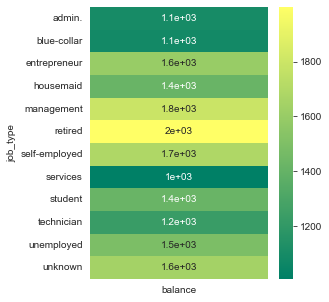

In [16]:
plt.figure(figsize=(4,5))
sns.heatmap(df.groupby("job_type").mean(numeric_only=True)[["balance"]],annot=True,cmap="summer")

In [17]:
#marital status vs mean  balance
df.groupby("marital").mean(numeric_only=True)["balance"]

marital
divorced    1238.530045
married     1430.163254
single      1284.613403
Name: balance, dtype: float64

In [18]:
#jobtype vs marital (here two categories are compared with respect to one another)
pd.crosstab(df["job_type"],df["marital"],margins=True)

<IPython.core.display.Javascript object>

marital        divorced  married  single    All
job_type                                       
admin.              499     1780    1155   3434
blue-collar         515     4641    1308   6464
entrepreneur        123      710     139    972
housemaid           126      619     100    845
management          739     3624    1956   6319
retired             296     1130      75   1501
self-employed        94      672     306   1072
services            383     1610     795   2788
student               4       36     589    629
technician          628     2647    1705   4980
unemployed          112      469     285    866
unknown               9      132      48    189
All                3528    18070    8461  30059

# Univariate Analysis-

It consist of Descriptive analysis of data-
1.Countplot
2.Pie chart

# Categorical analysis--

In [19]:
# Countplot function of categorical data--
def countplot_graph(data,col):
    print("Countplot of",col,"-------------")
    fig, ax = plt.subplots(figsize=(25, 15))
   
    sns.countplot(data[col], edgecolor=sns.color_palette("dark", 3),linewidth=3,ax=ax)
    inset_ax = inset_axes(ax, width="50%", height="50%", loc="upper right",)

    plt.pie(x=data[col].value_counts(),labels=data[col].value_counts().index,autopct="%.2f",textprops={'fontsize': 18})

    plt.rcParams['font.size'] = 10
    plt.tight_layout()
    plt.show()

Countplot of job_type -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


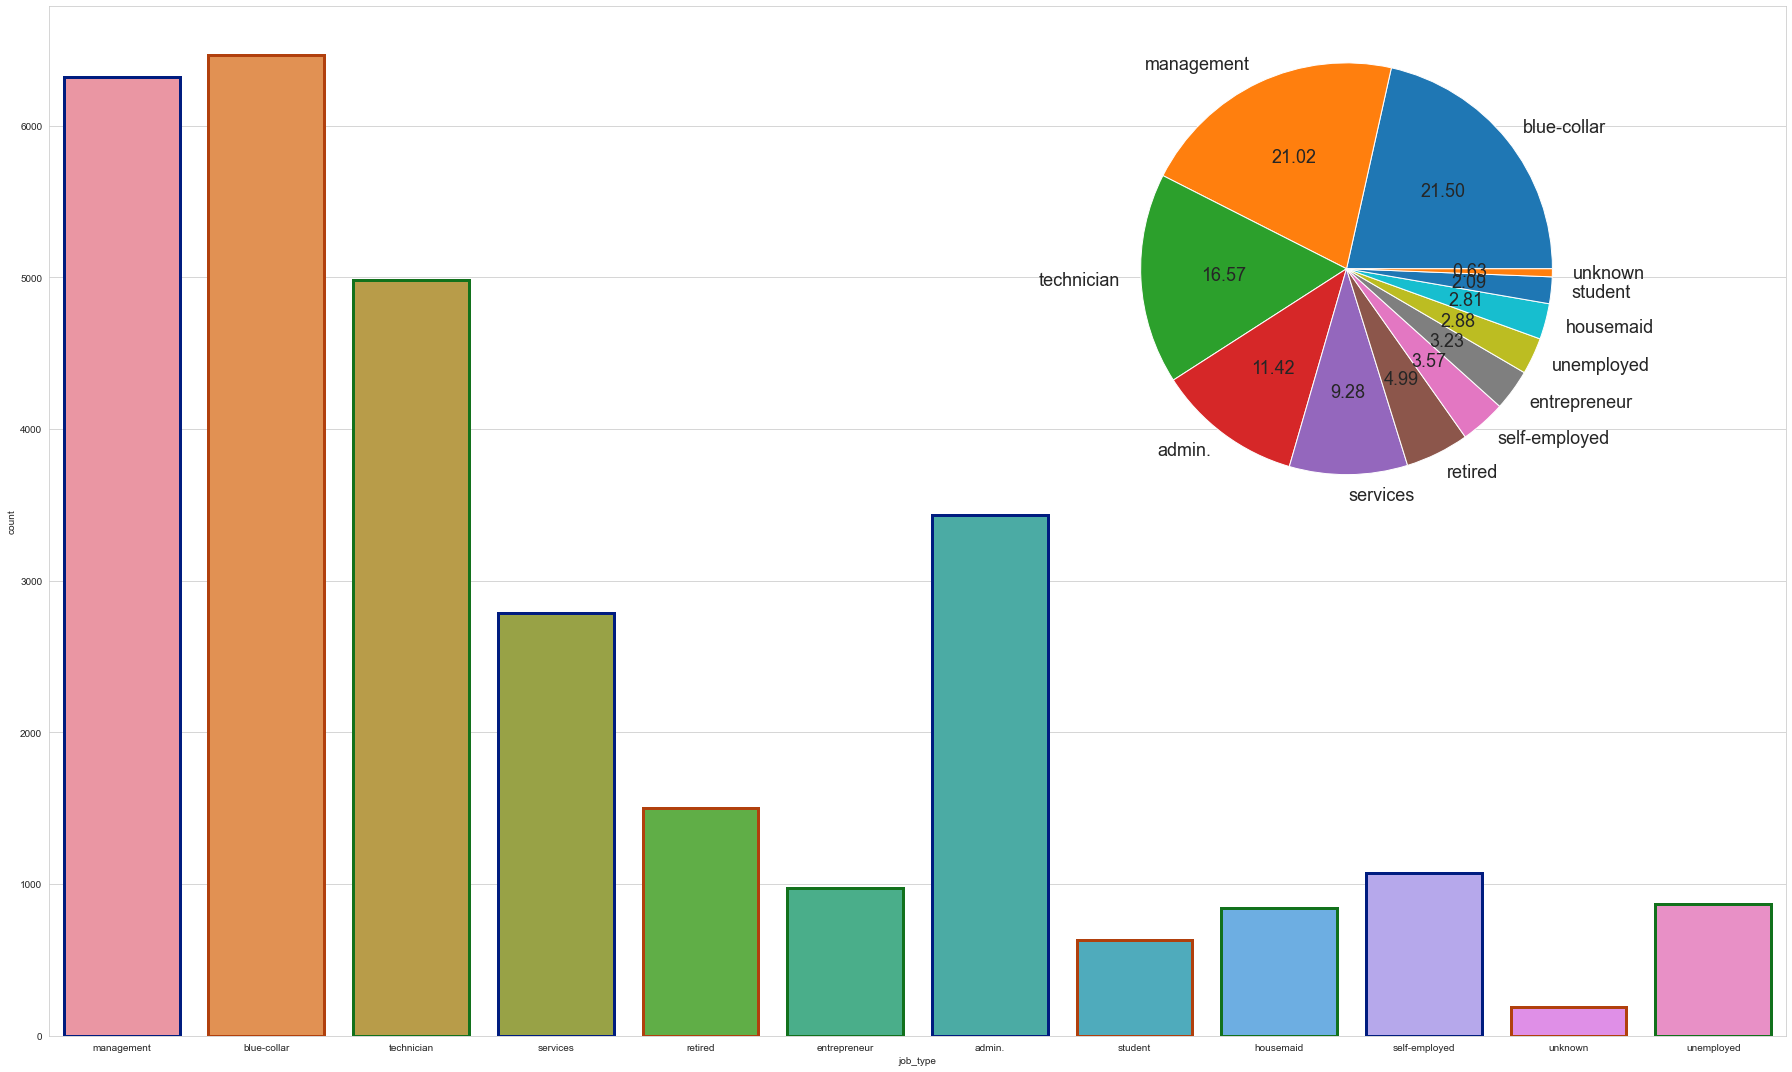

Countplot of marital -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


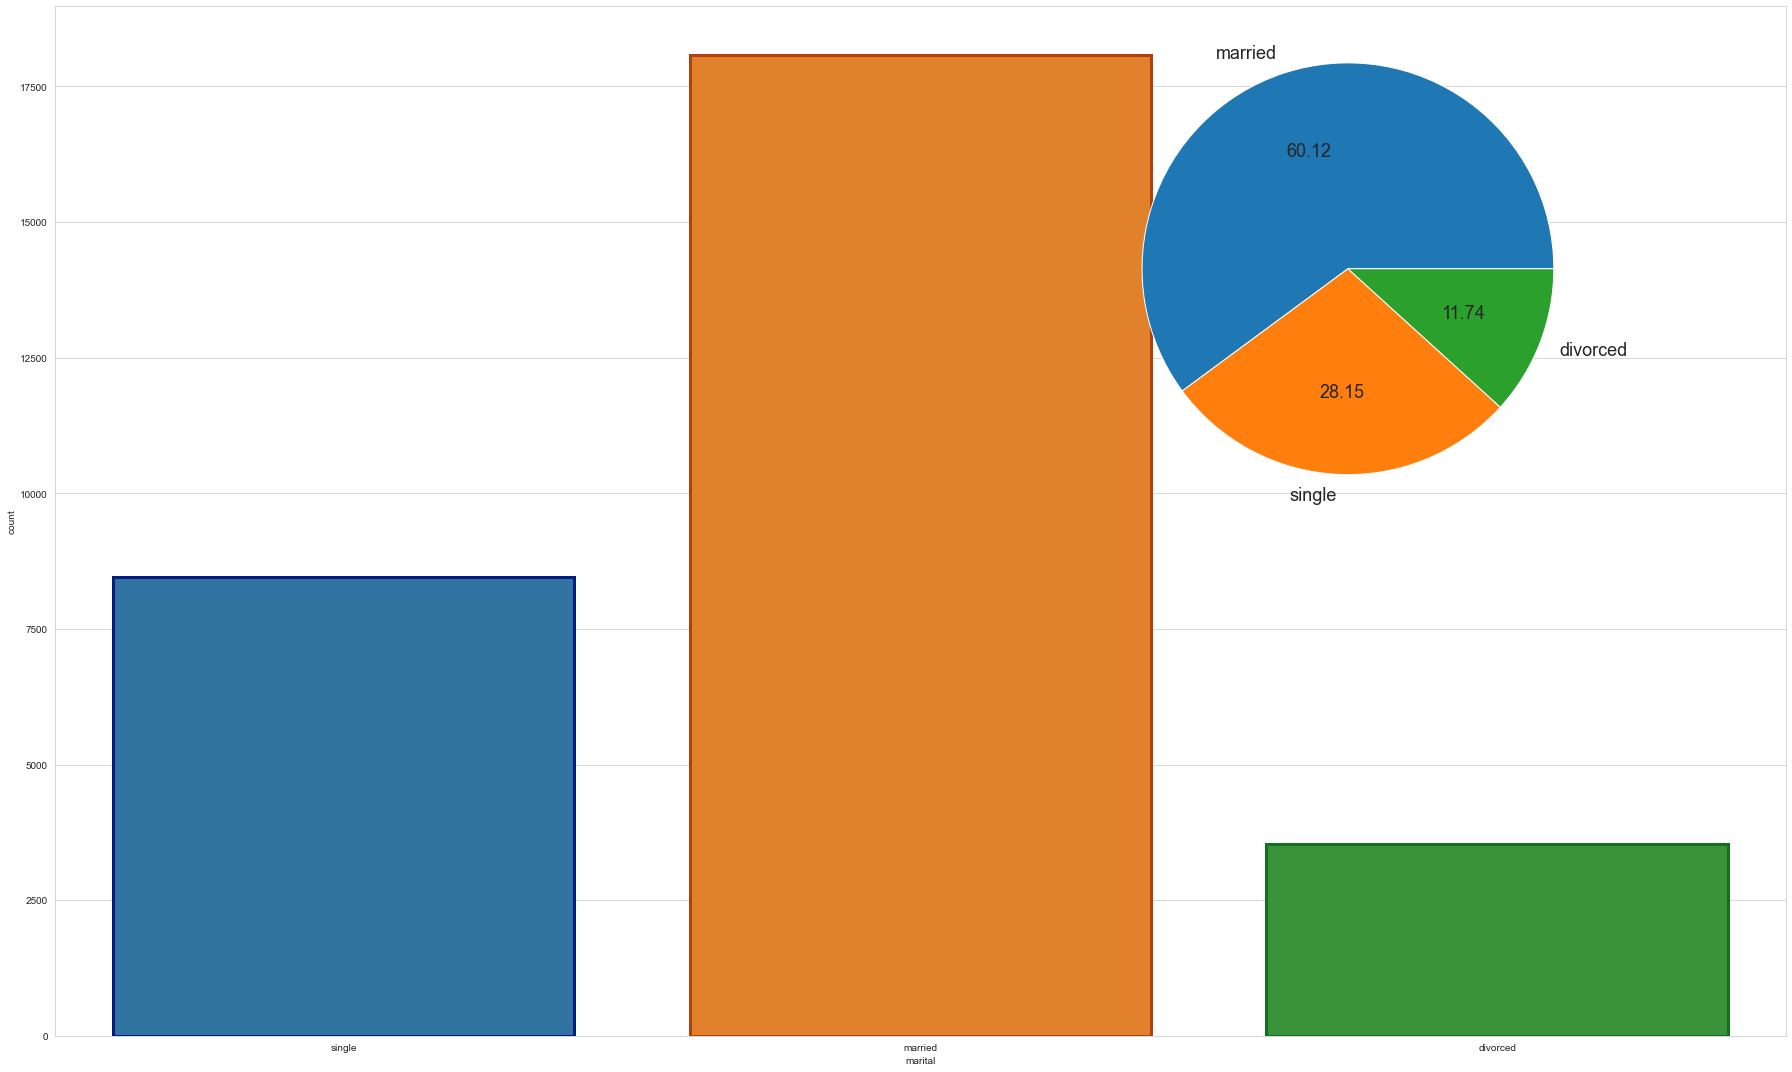

Countplot of education -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


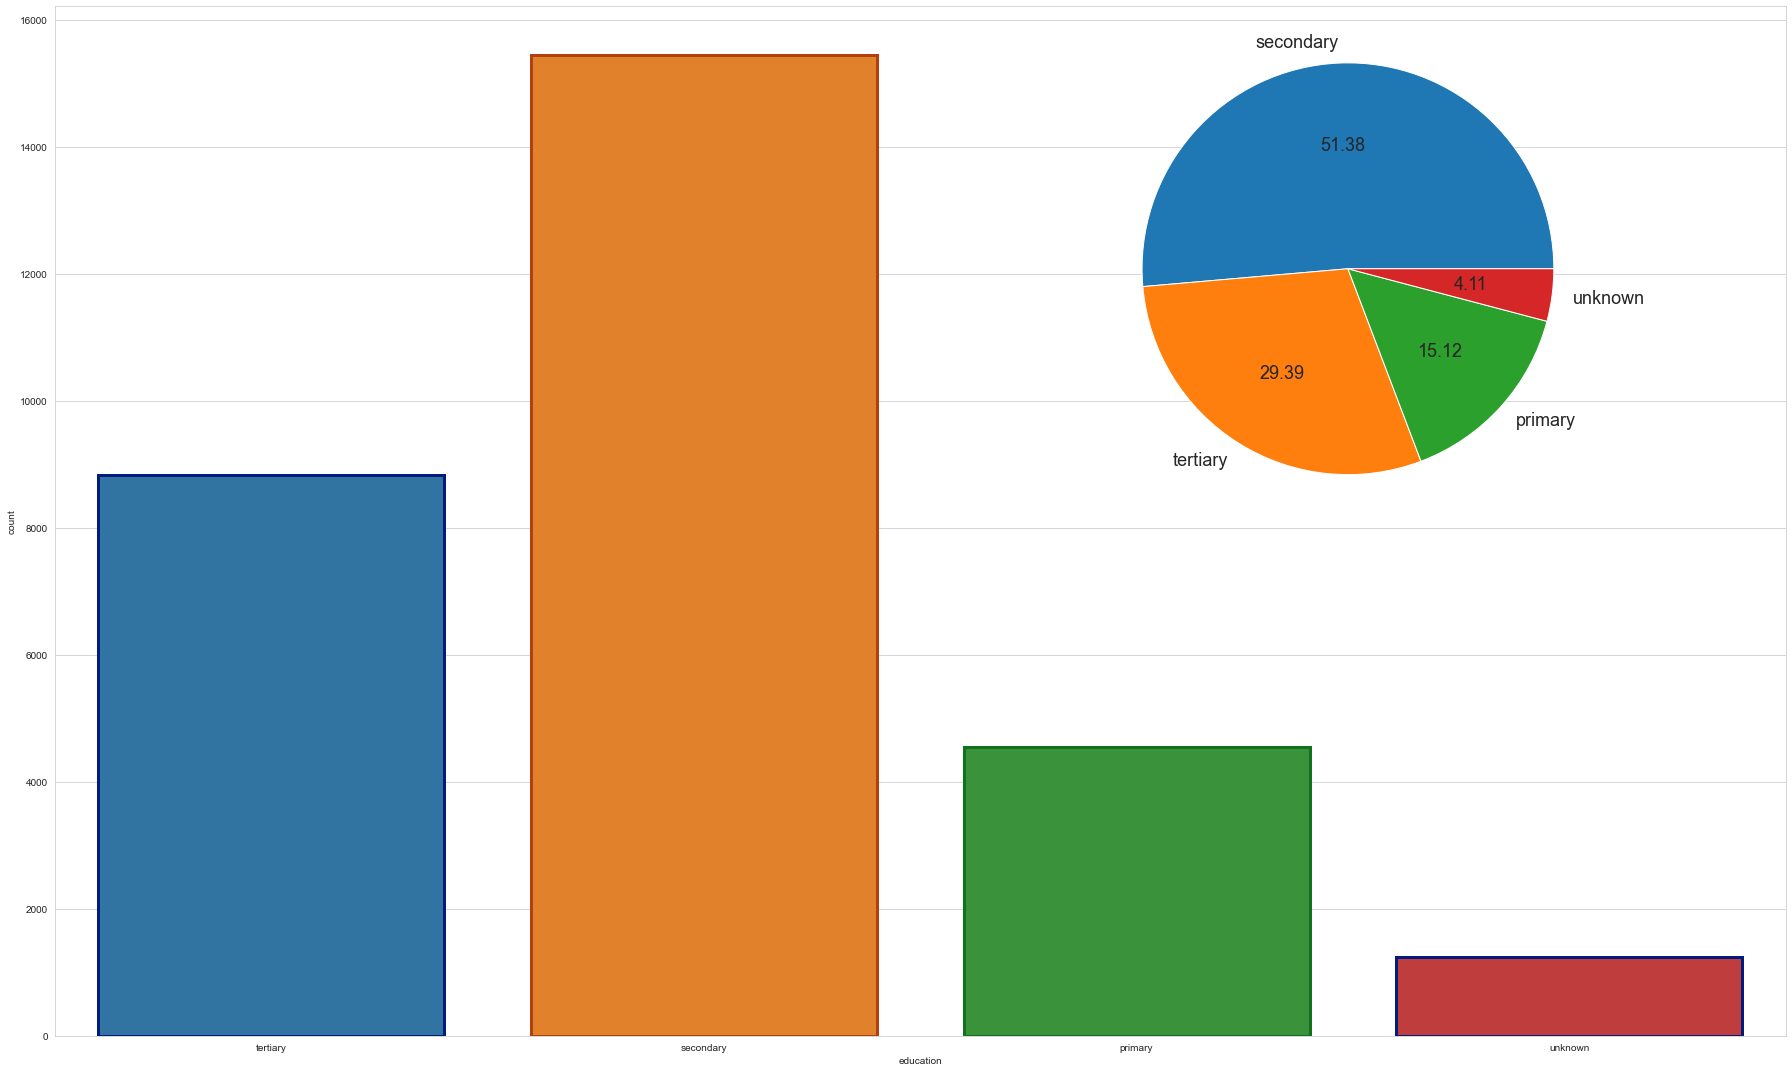

Countplot of default -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


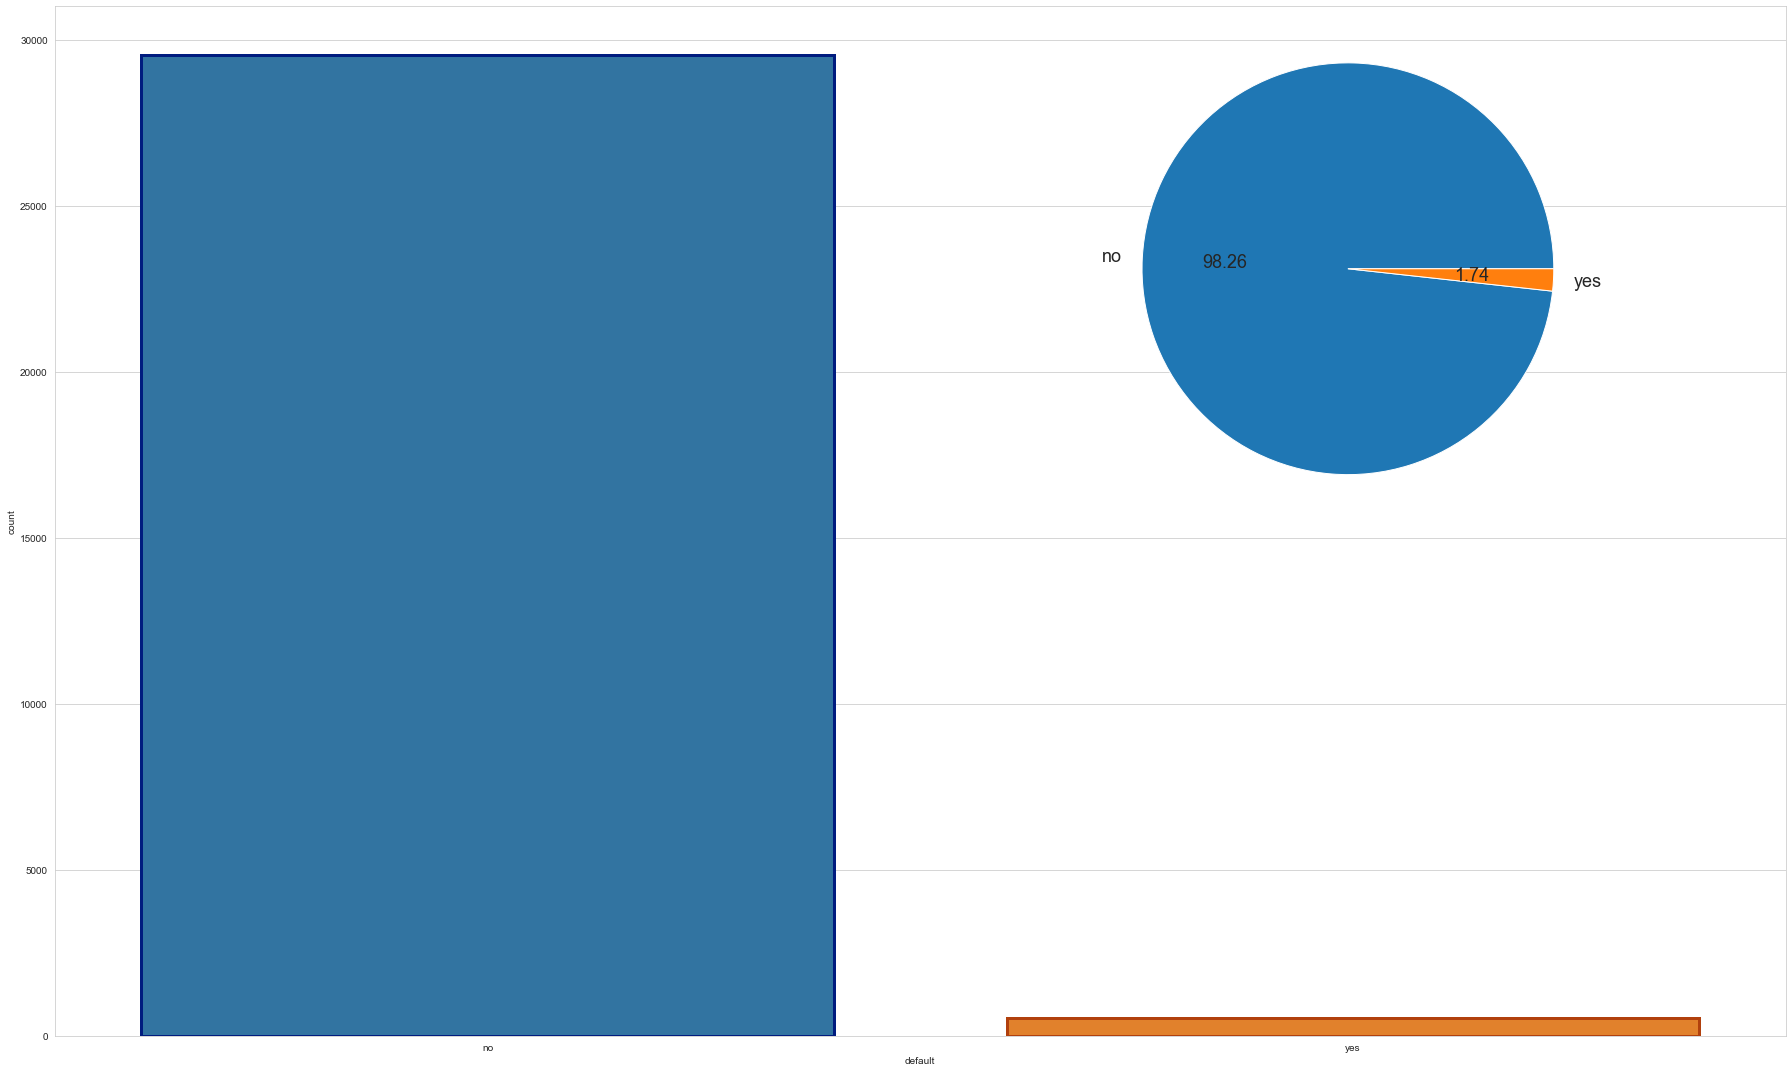

Countplot of housing_loan -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


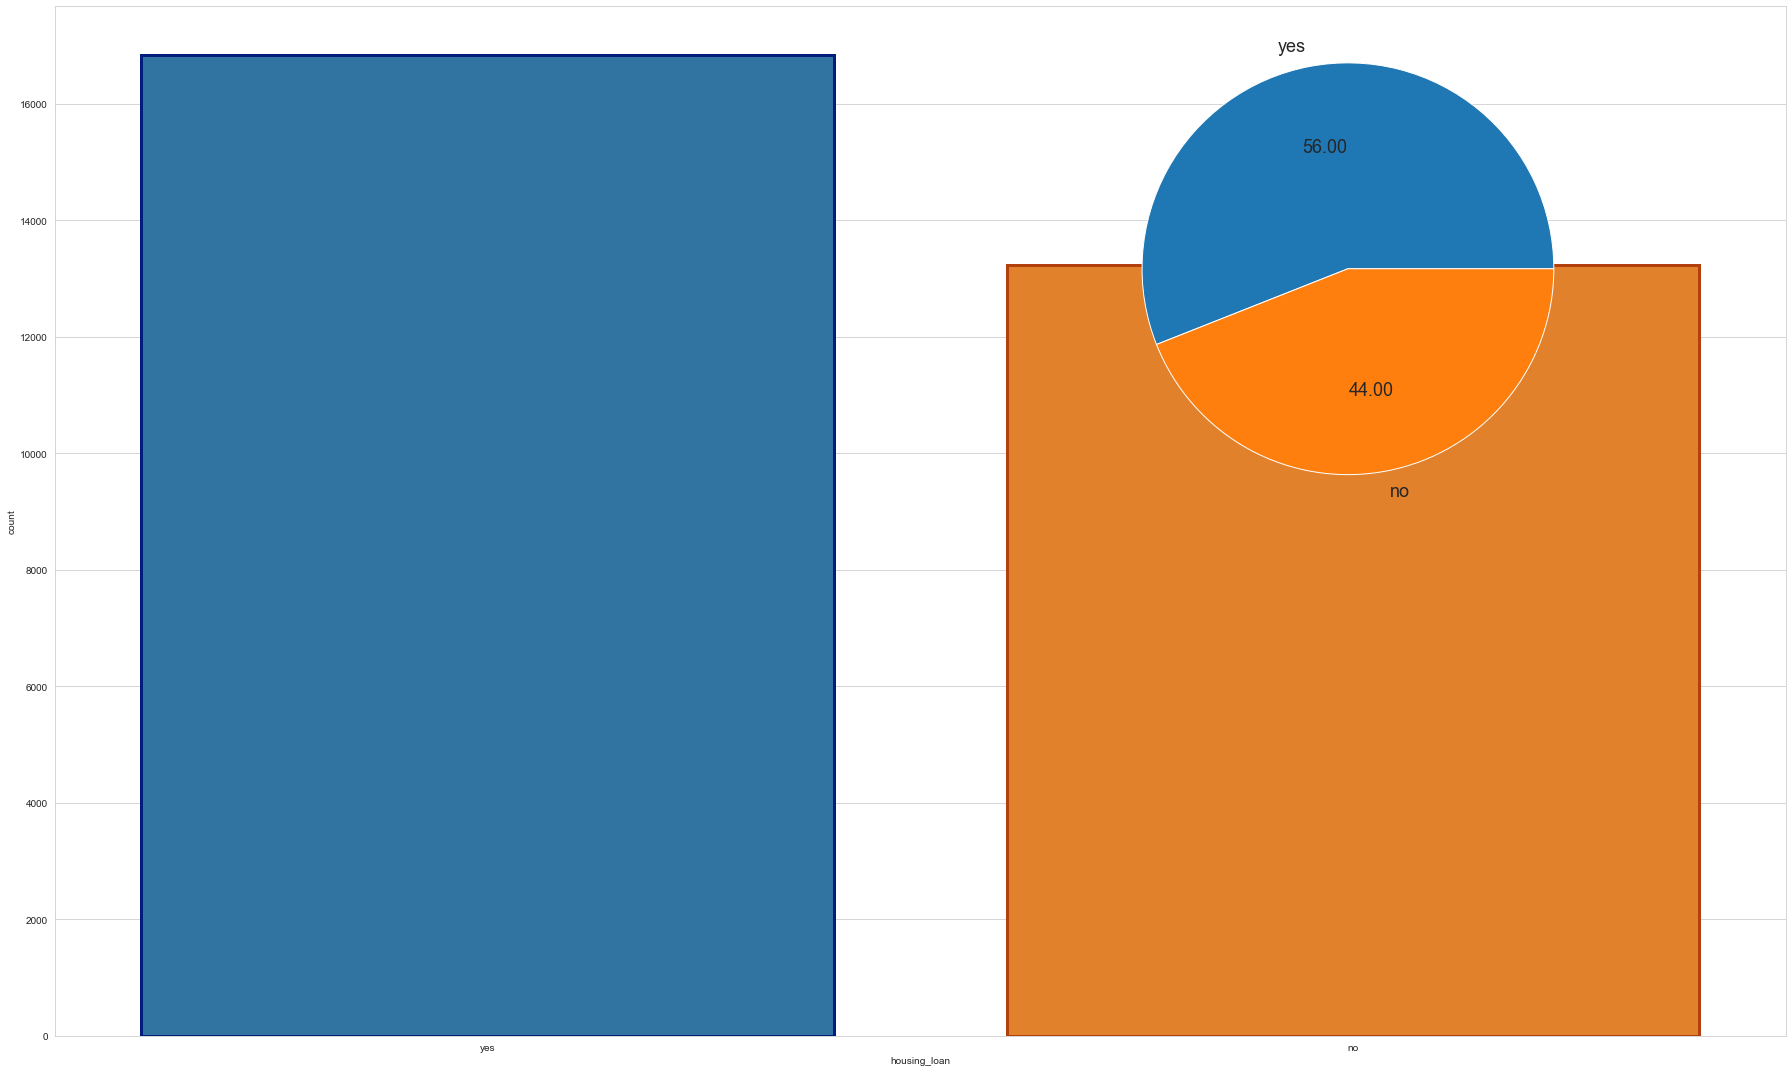

Countplot of personal_loan -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


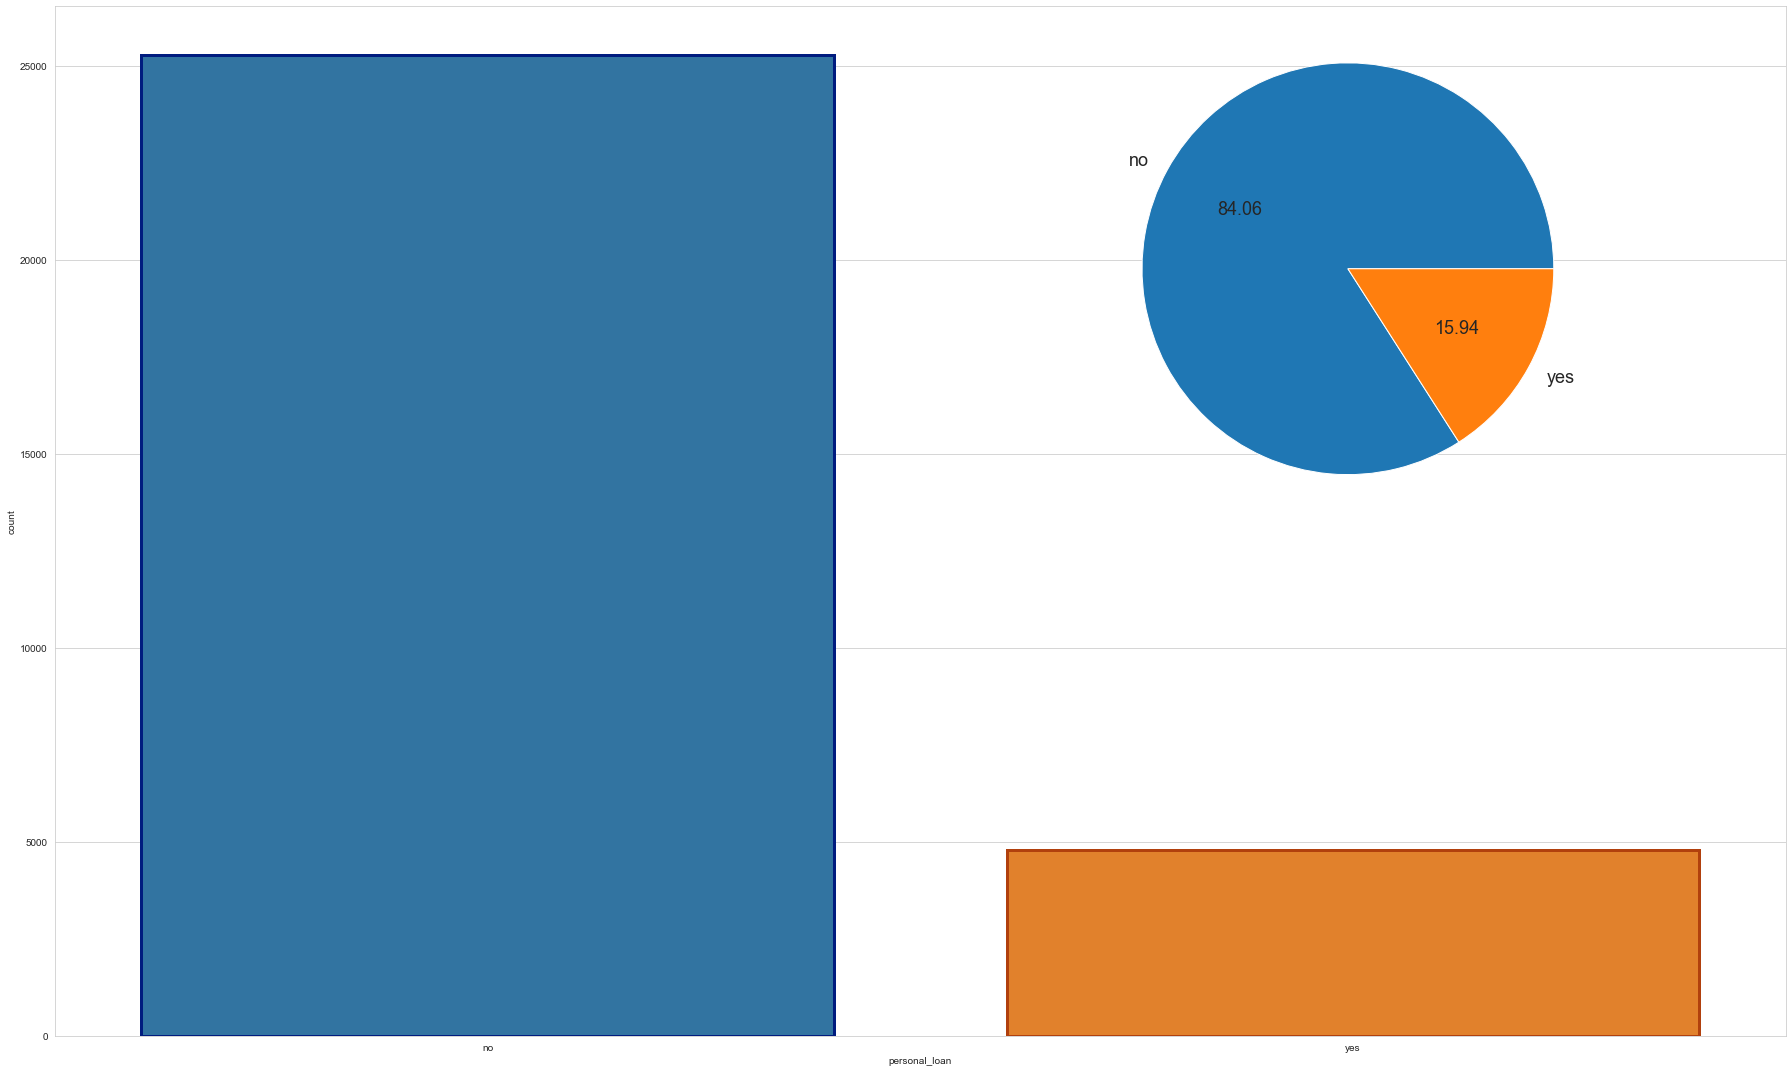

Countplot of communication_type -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


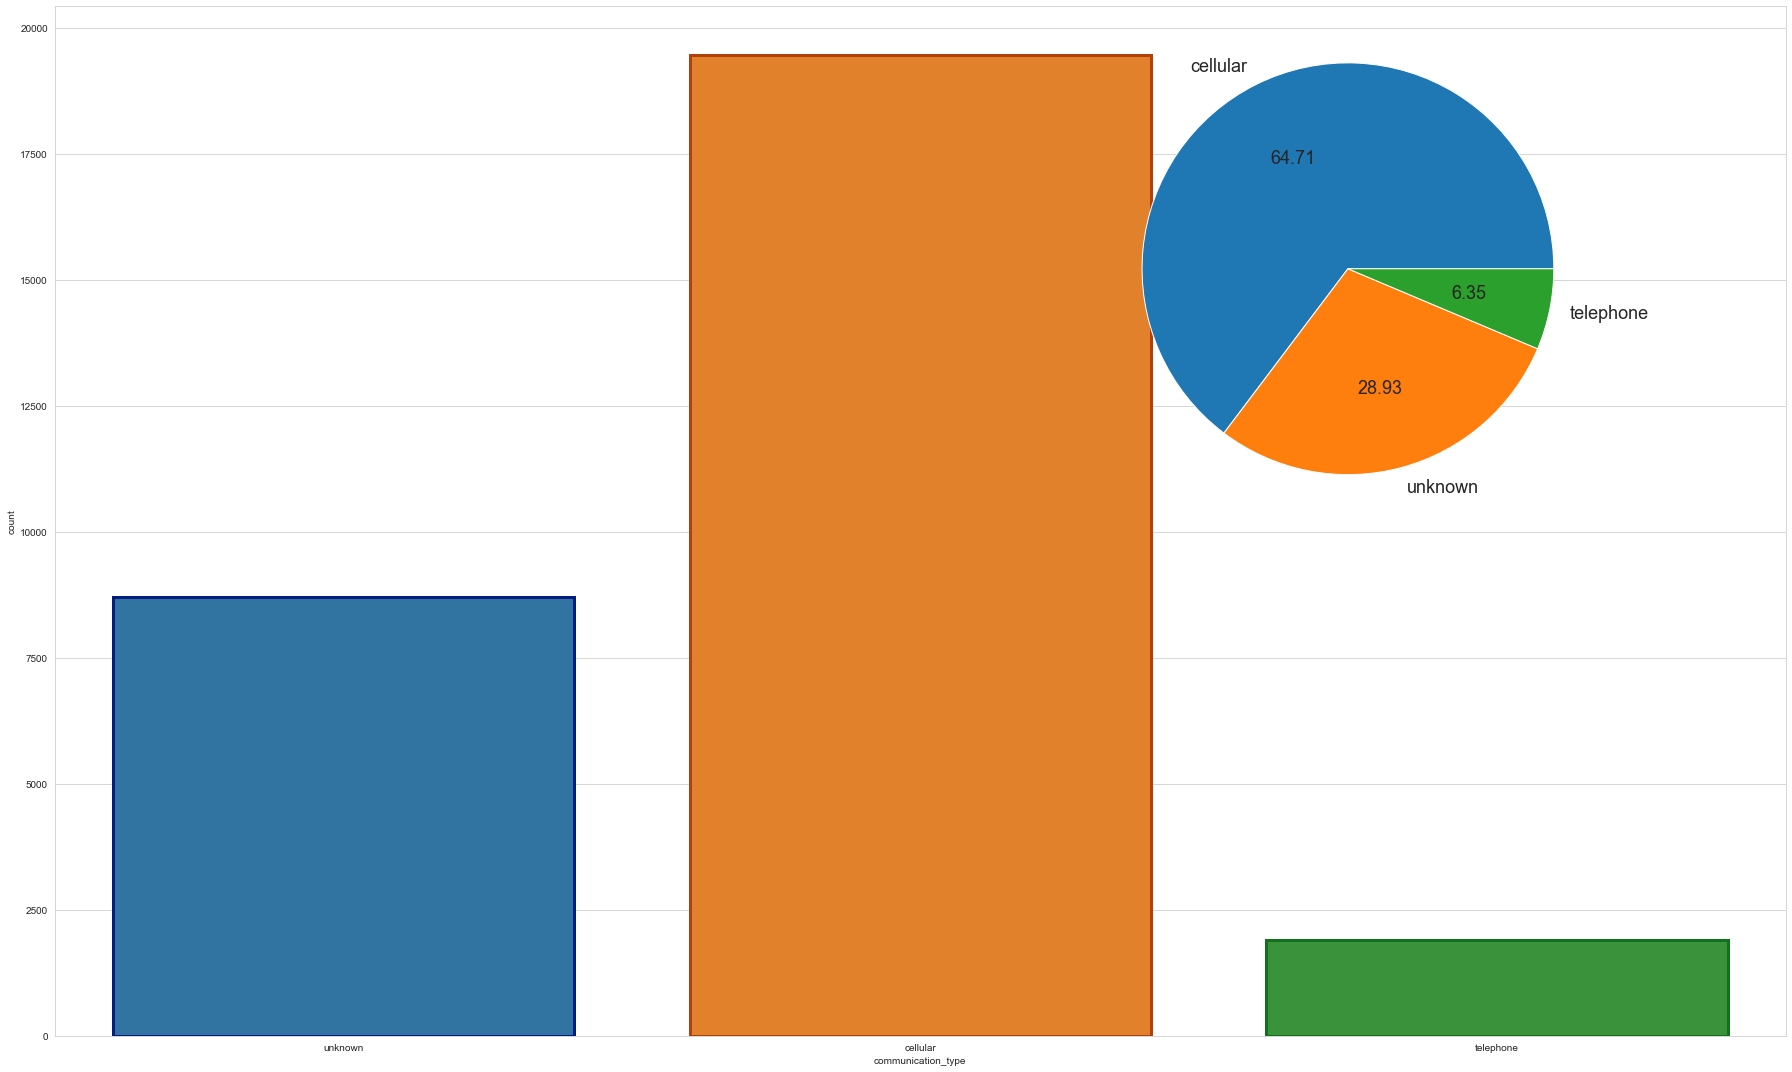

Countplot of prev_campaign_outcome -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


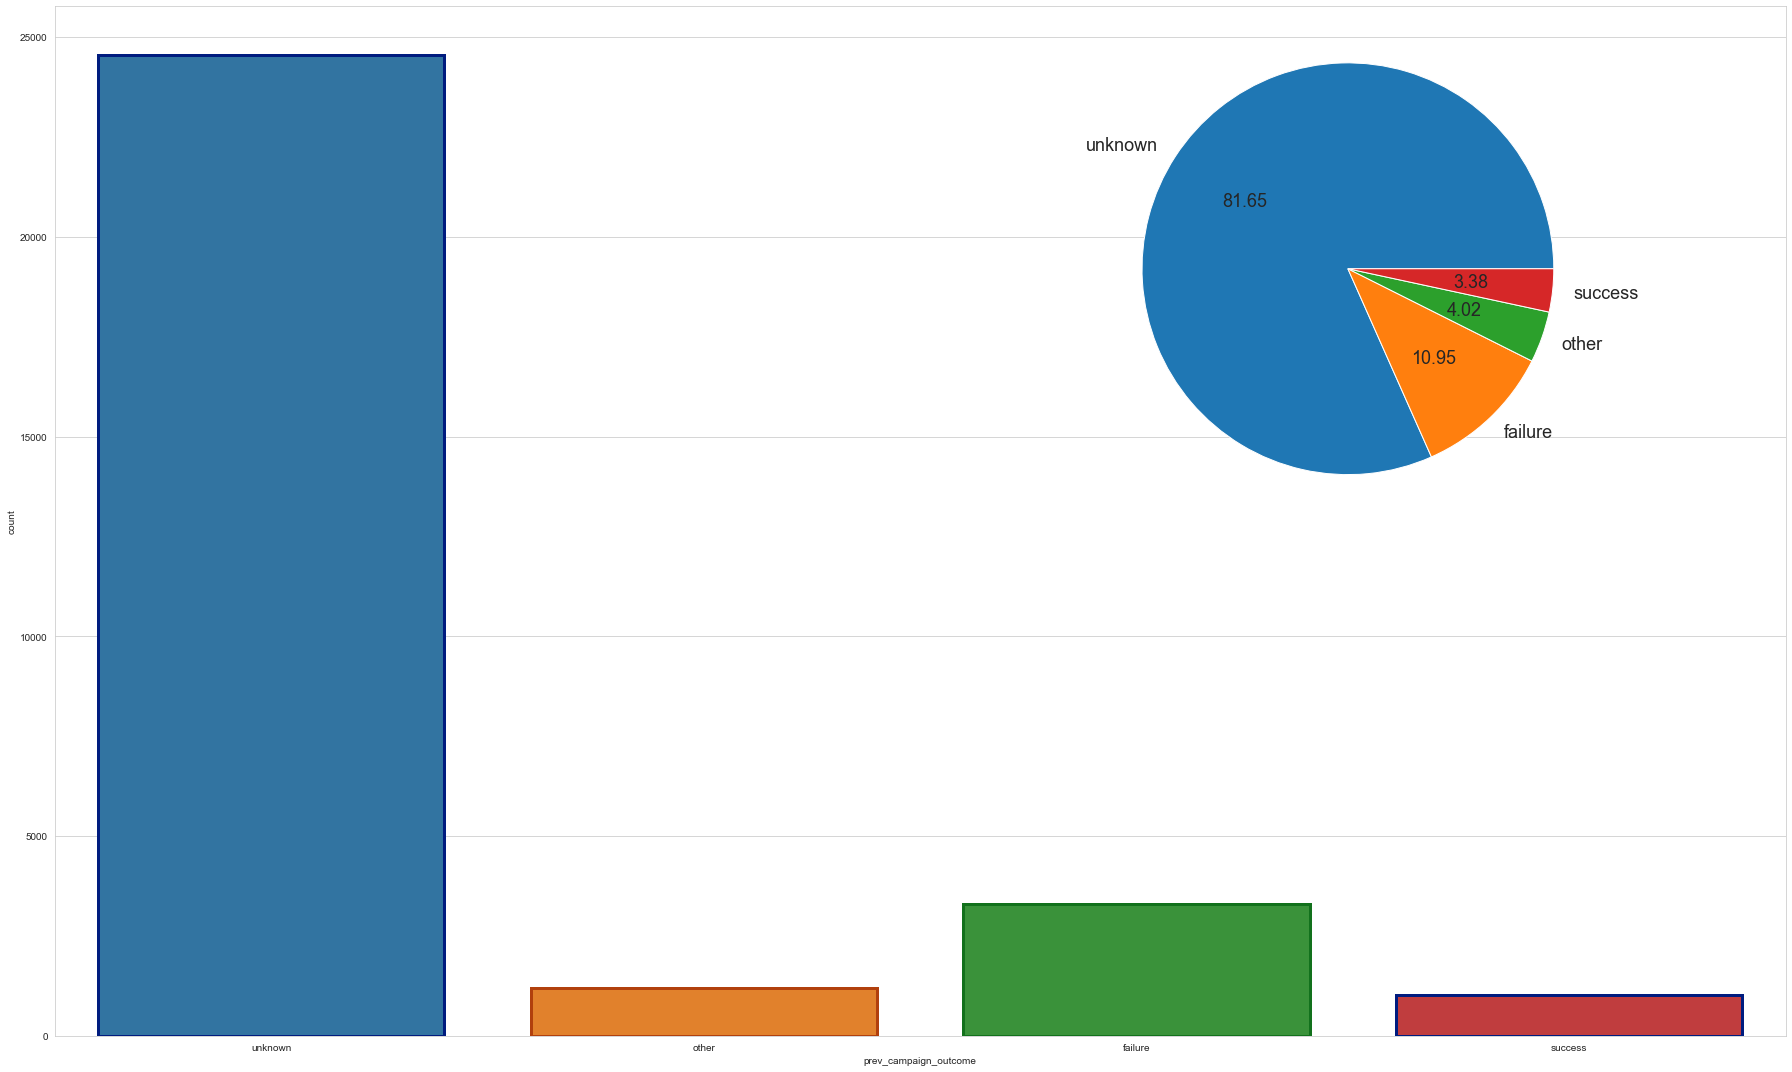

Countplot of term_deposit_subscribed -------------


C:\Users\Gaurav Pathak\AppData\Local\Temp\ipykernel_22080\3819274314.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


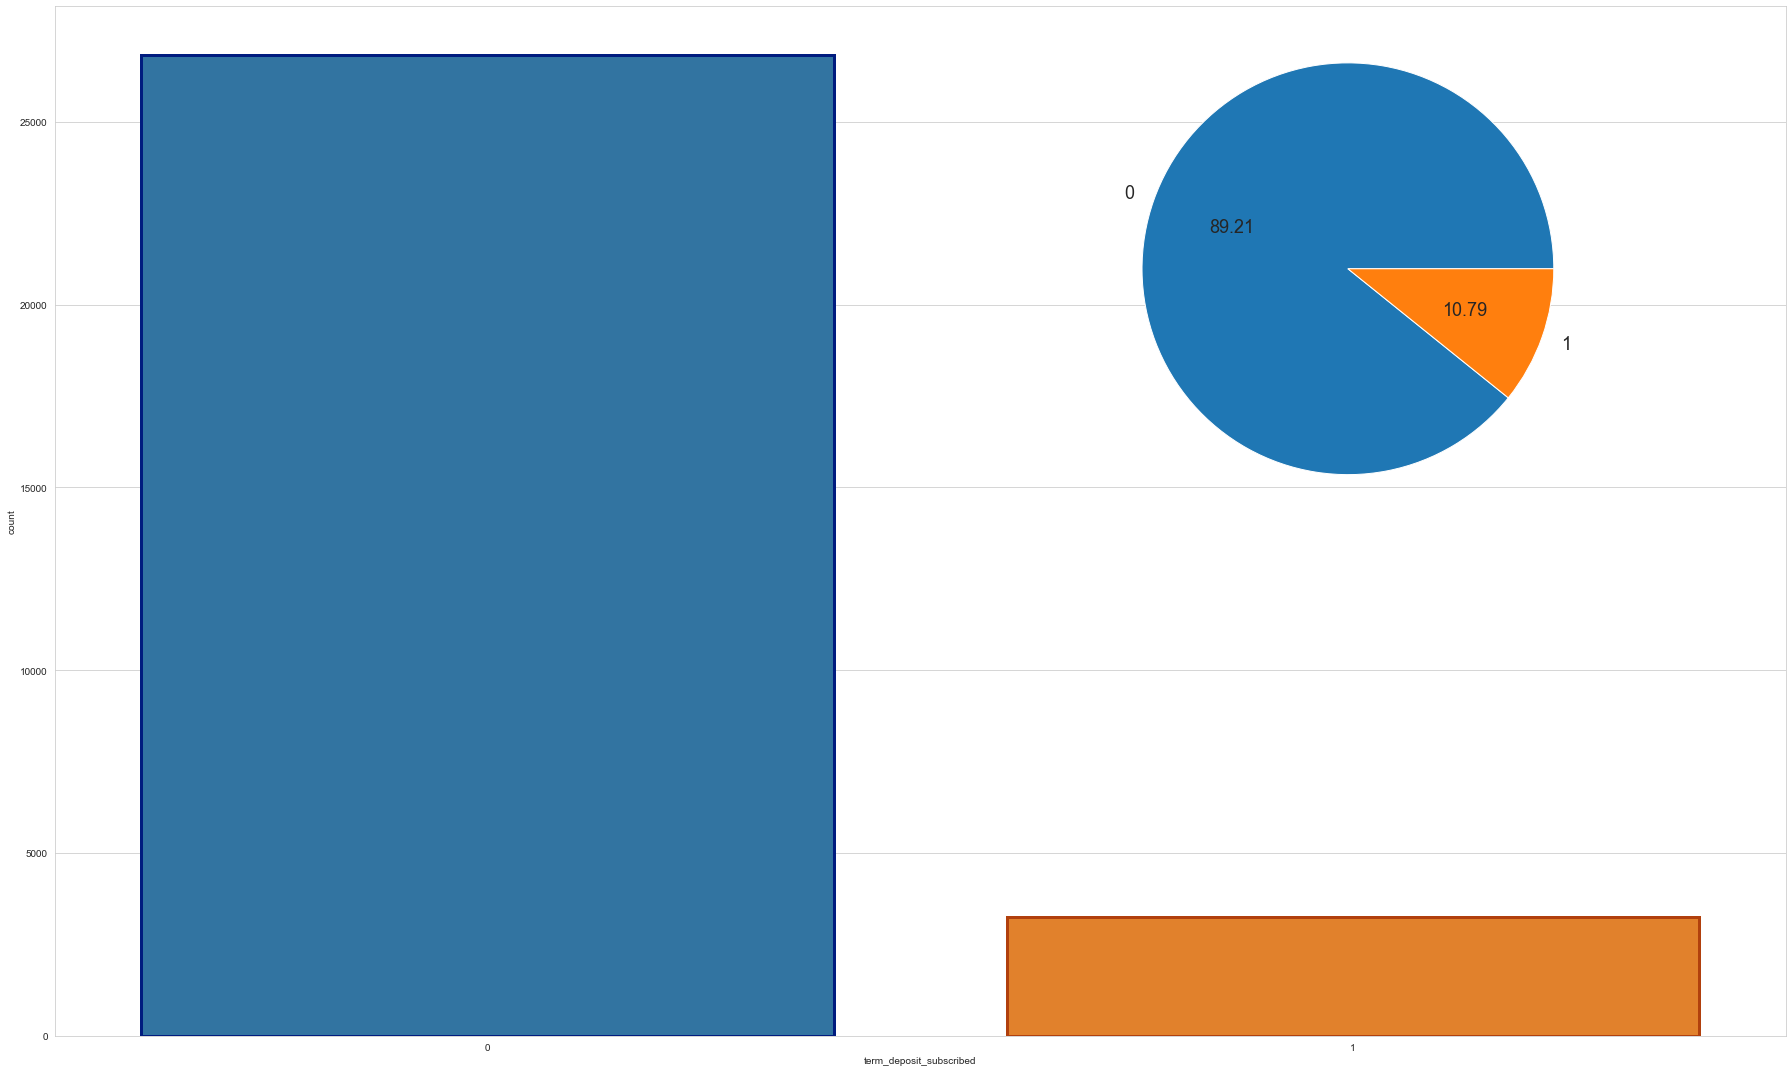

In [20]:
#creating countplot of all categories--
categorical_data=['job_type', 'marital', 'education', 'default',
                  'housing_loan', 'personal_loan', 'communication_type',
                  'prev_campaign_outcome','term_deposit_subscribed']

for i in categorical_data:
    countplot_graph(df,i)

In [21]:
Numerical=["customer_age","balance","last_contact_duration"]

In [22]:
df.head(2)

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   

  housing_loan personal_loan communication_type  last_contact_duration  \
0          yes            no            unknown                  303.0   
1           no           yes           cellular                  143.0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0

<AxesSubplot: xlabel='customer_age'>

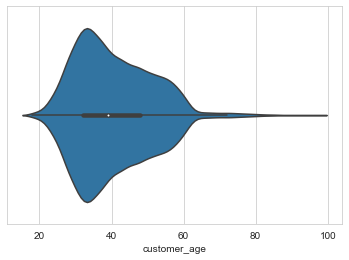

In [23]:
sns.violinplot(df["customer_age"])

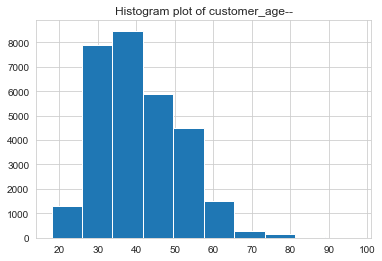

In [24]:

plt.hist(df["customer_age"],bins=10)
plt.title(label=('Histogram plot of customer_age--'))
plt.show()


skewness-- 0.6574079270474086


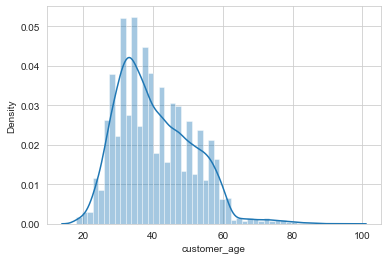

In [25]:
print("skewness--",df["customer_age"].skew())
sns.distplot(df["customer_age"])
plt.show()

In [26]:
def Box_chart(data,x):
    sns.boxplot(data[x])
    plt.show()

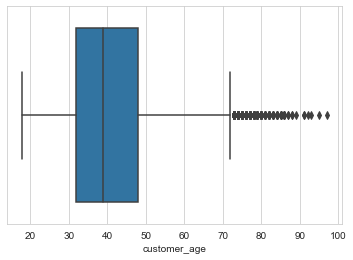

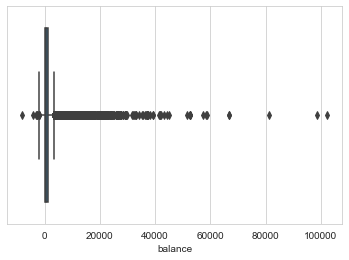

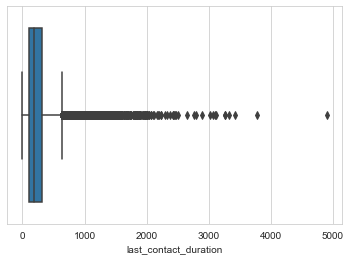

In [27]:
for i in Numerical:
    Box_chart(df,i)

# BIVARIATE ANALYSIS--

lets start with -Numerical-Numerical-:---

In [28]:
# Scatterplot--
Numerical

['customer_age', 'balance', 'last_contact_duration']

[]

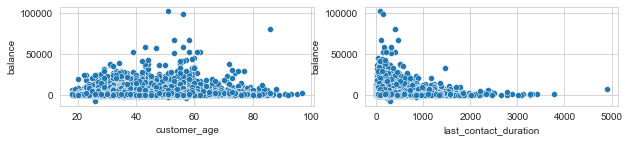

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.scatterplot(df["customer_age"],df['balance'])
plt.plot()

plt.subplot(2,2,2)
sns.scatterplot(df["last_contact_duration"],df['balance'])
plt.plot()



In [30]:
df.head(3)

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   

  housing_loan personal_loan communication_type  last_contact_duration  \
0          yes            no            unknown                  303.0   
1           no           yes           cellular                  143.0   
2           no            no           cellular                  101.0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='housing_loan', ylabel='job_type'>

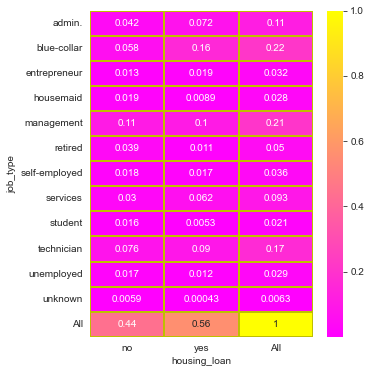

In [31]:
plt.figure(figsize=(5,6))
sns.heatmap(pd.crosstab(df["job_type"],df["housing_loan"],margins=True,normalize=True),annot=True,cmap="spring",linewidths=0.2,linecolor="y")


<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='personal_loan', ylabel='job_type'>

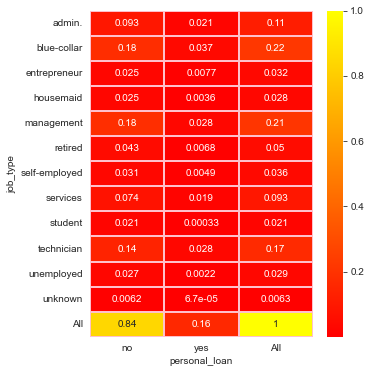

In [32]:
plt.figure(figsize=(5,6)) 
sns.heatmap(pd.crosstab(df["job_type"],df["personal_loan"],margins=True,normalize=True),annot=True,cmap="autumn",linewidths=0.2,linecolor="pink")

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='default', ylabel='education'>

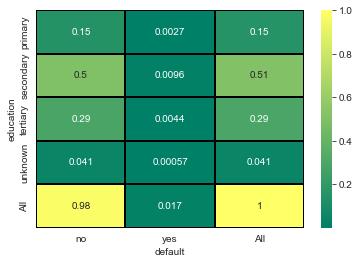

In [33]:
sns.heatmap(pd.crosstab(df["education"],df["default"],normalize=True,margins=True),annot=True,cmap="summer",linewidths=0.2,linecolor="black")

In [35]:
# Insight:-

In [36]:
df.sample(2)

customer_age     job_type  marital education default  balance  \
13487          53.0  blue-collar  married   primary      no    603.0   
1573           67.0      retired  married   primary      no    584.0   

      housing_loan personal_loan communication_type  last_contact_duration  \
13487          yes            no            unknown                  135.0   
1573            no            no           cellular                   96.0   

      prev_campaign_outcome  term_deposit_subscribed  
13487               unknown                        0  
1573                unknown                        0

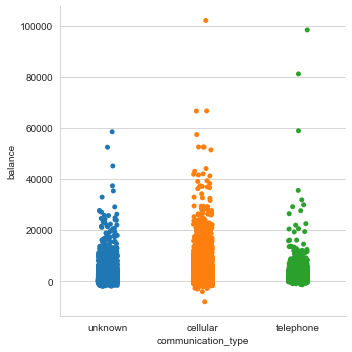

In [37]:
sns.catplot(x="communication_type",y="balance",kind="strip",data=df)

In [38]:
df.sample(2)

customer_age      job_type   marital  education default  balance  \
23794          43.0        admin.  divorced   tertiary      no   -361.0   
8416           49.0  entrepreneur   married  secondary      no   -798.0   

      housing_loan personal_loan communication_type  last_contact_duration  \
23794           no           yes           cellular                   89.0   
8416            no           yes           cellular                 1005.0   

      prev_campaign_outcome  term_deposit_subscribed  
23794               unknown                        0  
8416                unknown                        1

In [39]:
df.groupby("job_type").median()["balance"]

job_type
admin.           393.0
blue-collar      393.0
entrepreneur     358.0
housemaid        361.0
management       576.0
retired          756.0
self-employed    517.0
services         362.5
student          487.0
technician       410.5
unemployed       538.0
unknown          657.0
Name: balance, dtype: float64

In [40]:
(df.groupby('marital').median()["balance"])*100


marital
divorced    36100.0
married     47500.0
single      43600.0
Name: balance, dtype: float64

<AxesSubplot: xlabel='job_type', ylabel='customer_age'>

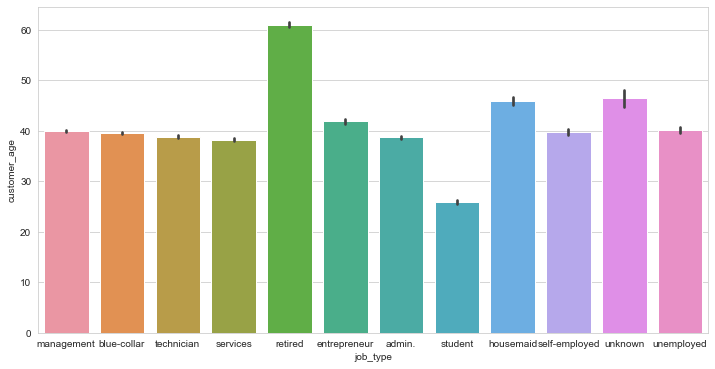

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="job_type",y="customer_age")

<AxesSubplot: xlabel='marital', ylabel='customer_age'>

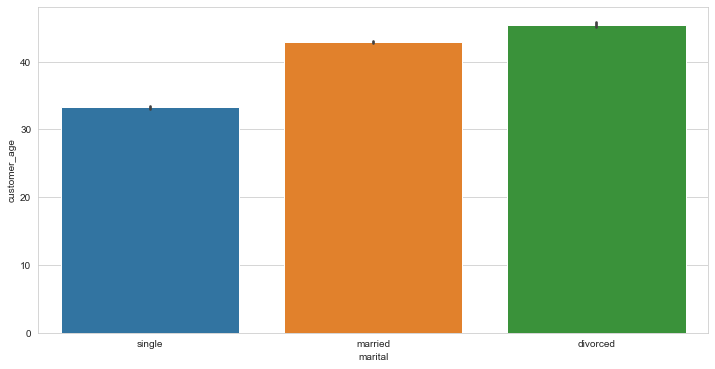

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="marital",y="customer_age")

<AxesSubplot: xlabel='education', ylabel='balance'>

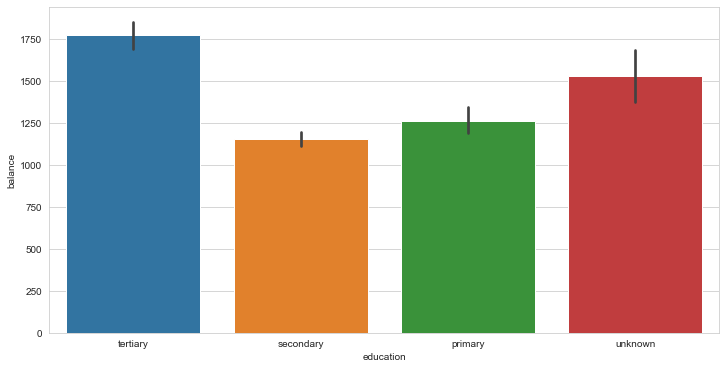

In [43]:



plt.figure(figsize=(12,6))
sns.barplot(data=df,x="education",y="balance")

<AxesSubplot: xlabel='personal_loan', ylabel='balance'>

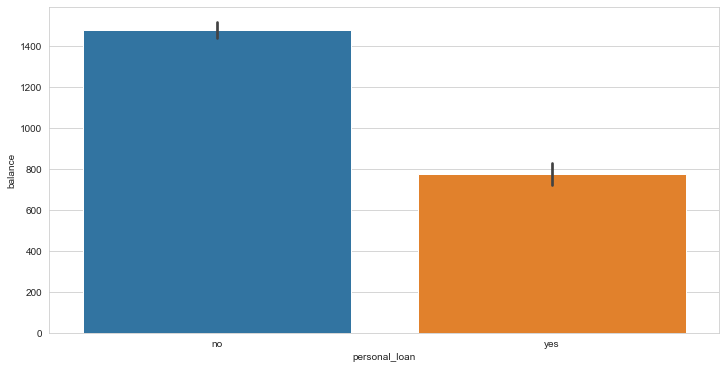

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="personal_loan",y="balance")

In [45]:
df.sample(2)

customer_age    job_type  marital  education default  balance  \
20959          27.0    services   single  secondary      no     -5.0   
5215           35.0  technician  married   tertiary      no    301.0   

      housing_loan personal_loan communication_type  last_contact_duration  \
20959           no           yes           cellular                  128.0   
5215           yes            no           cellular                  364.0   

      prev_campaign_outcome  term_deposit_subscribed  
20959               unknown                        0  
5215                unknown                        0

# Multivariate analysis-

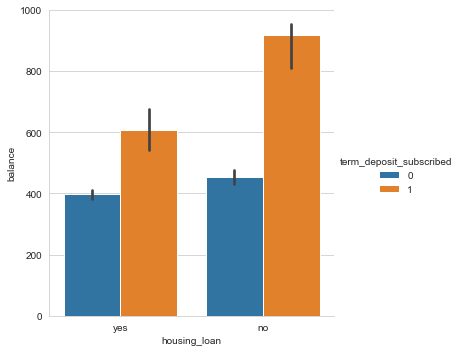

In [46]:
sns.catplot(x="housing_loan",y="balance",kind="bar",hue="term_deposit_subscribed",estimator=np.median,data=df)

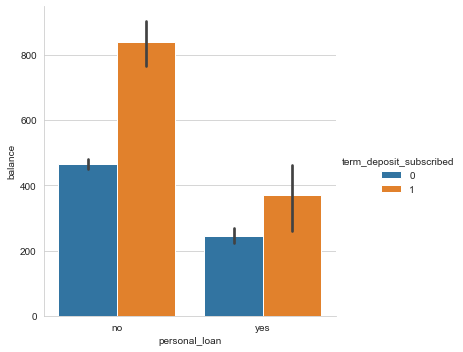

In [47]:
sns.catplot(x="personal_loan",y="balance",kind="bar",hue="term_deposit_subscribed",estimator=np.median,data=df)

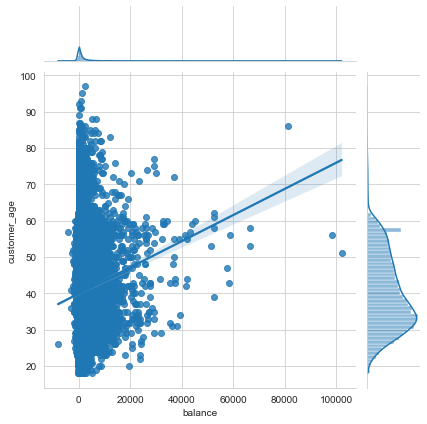

In [48]:
sns.jointplot(x="balance",y="customer_age",data=df,kind="reg")

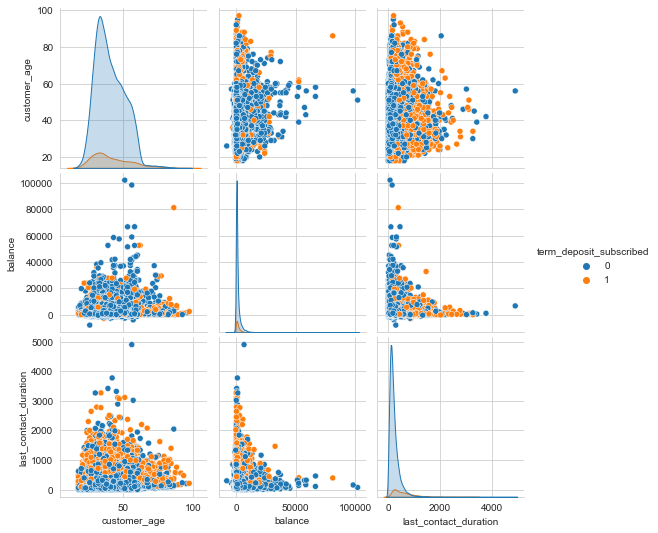

In [49]:
sns.pairplot(df,hue="term_deposit_subscribed")

In [50]:
x=df.pivot_table(index="job_type",columns="education",values="balance",aggfunc="median")

<AxesSubplot: xlabel='education', ylabel='job_type'>

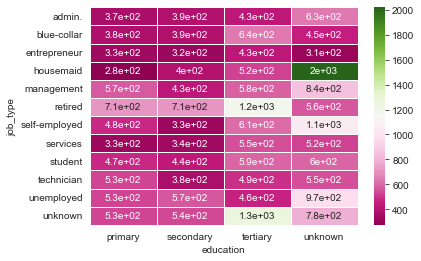

In [51]:
sns.heatmap(x,cmap="PiYG",linewidths=0.5,annot=True)

In [52]:
df.head(2)

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   

  housing_loan personal_loan communication_type  last_contact_duration  \
0          yes            no            unknown                  303.0   
1           no           yes           cellular                  143.0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0

In [53]:
t=df.pivot_table(index="prev_campaign_outcome",columns="personal_loan",values="balance",aggfunc="median")

<AxesSubplot: xlabel='personal_loan', ylabel='prev_campaign_outcome'>

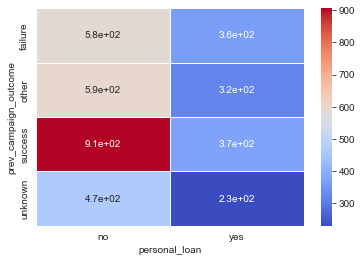

In [54]:
sns.heatmap(t,cmap="coolwarm",linewidths=0.5,annot=True)

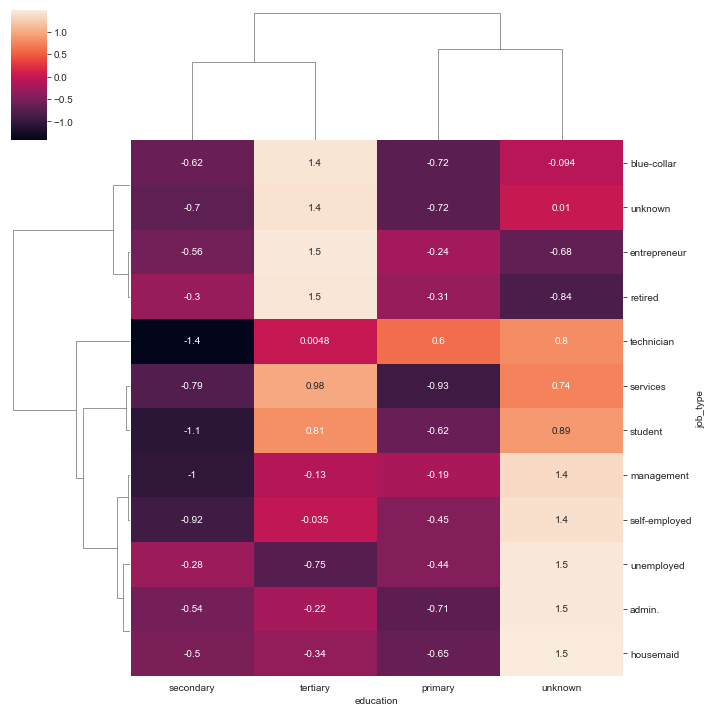

In [55]:
sns.clustermap(x,metric="correlation",annot=True,z_score=0)

# Feature Engineering-

In [56]:
df.head()

customer_age     job_type  marital  education default  balance  \
0          28.0   management   single   tertiary      no    285.0   
1          34.0  blue-collar  married  secondary      no    934.0   
2          46.0   technician  married  secondary      no    656.0   
3          34.0     services   single  secondary      no      2.0   
4          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  last_contact_duration  \
0          yes            no            unknown                  303.0   
1           no           yes           cellular                  143.0   
2           no            no           cellular                  101.0   
3          yes            no            unknown                  127.0   
4          yes            no           cellular                   49.0   

  prev_campaign_outcome  term_deposit_subscribed  
0               unknown                        0  
1                 other                        0  
2               unknown                        0  
3               unknown                        0  
4               unknown                        0

For customer segmentation, you should focus on columns that capture
distinct customer characteristics relevant to spending, financial stability,
and preferences.

In [99]:
df=df[["customer_age","job_type","marital","education","balance","housing_loan","personal_loan","last_contact_duration"]]

In [103]:
print(pca.explained_variance_ratio_)


[0.11454142 0.10644465]


In [58]:
df.head()

customer_age     job_type  marital  education  balance housing_loan  \
0          28.0   management   single   tertiary    285.0          yes   
1          34.0  blue-collar  married  secondary    934.0           no   
2          46.0   technician  married  secondary    656.0           no   
3          34.0     services   single  secondary      2.0          yes   
4          41.0  blue-collar  married    primary   1352.0          yes   

  personal_loan  last_contact_duration  
0            no                  303.0  
1           yes                  143.0  
2            no                  101.0  
3            no                  127.0  
4            no                   49.0

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(df,test_size=0.15)

In [72]:
x_train

customer_age       job_type   marital  education  balance housing_loan  \
4796           34.0    blue-collar   married  secondary    219.0           no   
5763           30.0    blue-collar    single  secondary    527.0          yes   
2641           37.0     management    single   tertiary    582.0          yes   
12363          37.0         admin.    single   tertiary    635.0           no   
30974          36.0     technician    single  secondary      5.0           no   
...             ...            ...       ...        ...      ...          ...   
12206          33.0     management    single   tertiary   3886.0          yes   
20763          34.0  self-employed    single   tertiary    660.0          yes   
18159          57.0    blue-collar   married  secondary    201.0          yes   
15520          58.0         admin.  divorced  secondary    631.0           no   
12580          66.0     management   married  secondary    588.0           no   

      personal_loan  last_contact_duration  
4796             no                   30.0  
5763             no                  563.0  
2641             no                  119.0  
12363            no                  253.0  
30974            no                   46.0  
...             ...                    ...  
12206           yes                  148.0  
20763            no                  153.0  
18159            no                  157.0  
15520            no                   95.0  
12580            no                  210.0  

[25550 rows x 8 columns]

In [156]:
d=df[["balance","last_contact_duration","customer_age"]]

In [157]:
s1=StandardScaler()
pt=s1.fit_transform(d)

<AxesSubplot: >

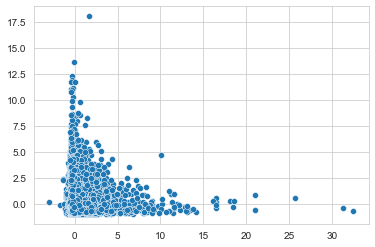

In [158]:
sns.scatterplot(x=pt[:,0],y=pt[:,1])

In [159]:
wcss=[]
for i in range(1,19):
    km=KMeans(n_clusters=i)
    km.fit(pt)
    wcss.append(km.inertia_)
    
    

In [160]:
km.labels_

array([16, 12,  9, ...,  9,  9, 12])

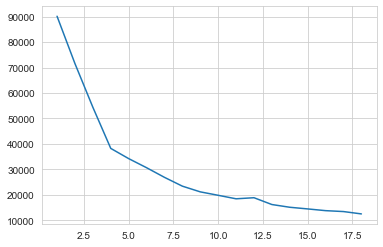

In [161]:
plt.plot(range(1,19),wcss)

In [173]:
sil_coef=[]
for i in range(2,19):
    km=KMeans(n_clusters=i)
    km.fit(pt)
    silhout_score=silhouette_score(pt,km.labels_)
    sil_coef.append(silhout_score)

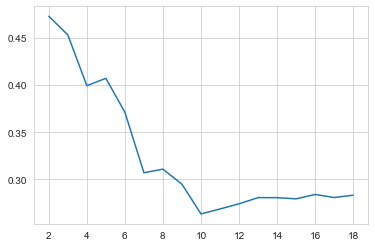

In [174]:
plt.plot(range(2,19),sil_coef)

In [ ]:
# import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10,7))
# dend=shc.dendrogram(shc.linkage(demo,method='ward'))

In [175]:
k=KMeans(n_clusters=2)
k.fit_predict(pt)

array([1, 1, 0, ..., 1, 0, 1])

In [172]:
from sklearn.metrics import silhouette_score

In [177]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [178]:
px.scatter_3d(x=pt[:,0],y=pt[:,1],z=pt[:,2],color=km.labels_)

<AxesSubplot: >

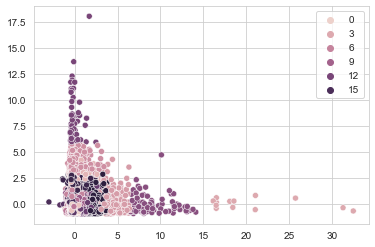

In [179]:
sns.scatterplot(x=pt[:,0],y=pt[:,1],hue=km.labels_)

<AxesSubplot: >

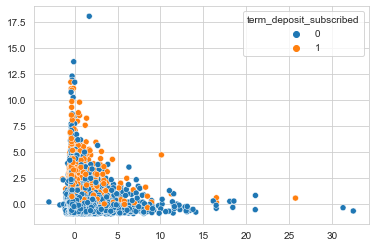

In [180]:
sns.scatterplot(x=pt[:,0],y=pt[:,1],hue=df["term_deposit_subscribed"])